In [61]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.display import display

In [65]:
!ls -lt | head

total 140
-rw-rw-r-- 1 spencerbraun spencerbraun  7287 Mar 14 20:21 edit_success_20210314.20.03.1615752938_model_epoch0_ts10000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun 27801 Mar 14 20:20 Untitled.ipynb
-rw-rw-r-- 1 spencerbraun spencerbraun  7495 Mar 14 20:07 edit_success_20210314.20.03.1615752056_gpt2_epoch0_ts10000.20210310.18.03.1615401990
-rw-rw-r-- 1 spencerbraun spencerbraun  7469 Mar 14 19:59 edit_success_20210314.19.03.1615751556_OTS
-rw-rw-r-- 1 spencerbraun spencerbraun  7262 Mar 14 19:48 edit_success_20210314.19.03.1615750890_model_epoch0_ts10000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  7276 Mar 14 19:41 edit_success_20210314.19.03.1615750412_model_epoch0_ts10000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  5108 Mar 14 19:26 edit_success_20210314.19.03.1615749643_model_epoch0_ts10000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  5261 Mar 13 00:07 edit_success_20210312.23.03.1615593547_

In [55]:
class ModelComps:
    def __init__(self, model_path):
        
        self.model_path = model_path
        self.base_path = "edit_success_20210314.20.03.1615752056_gpt2_epoch0_ts10000.20210310.18.03.1615401990"
        self.ots_path = "edit_success_20210314.19.03.1615751556_OTS"
        
        self.model = self.readData(self.model_path)
        self.base = self.readData(self.base_path)
        self.ots = self.readData(self.ots_path)
        
        self.modelMap = {
            'model': self.model, 
            'ots': self.ots, 
            'base': self.base
        }
        
        self.stats = {}
        
    @staticmethod
    def readData(path):
        
        return pd.read_csv(path)
    
    def runStats(self, modelOnly=False):

        models = {'model': self.model} if modelOnly else self.modelMap
        for name, model in models.items():  
            mean_ppl = model.apply(lambda x: x.new_ppl + x.orig_ppl, axis=1).mean() / 2
            pct_ppl_dd = model.apply(lambda x: (x.new_ppl - x.orig_ppl)/x.orig_ppl, axis=1).mean()
            gross_ppl_dd = model.apply(lambda x: x.new_ppl - x.orig_ppl, axis=1).mean()
            success_by_logits = model.success.mean()
            try:
                success_by_probs = model.apply(lambda x: x.new_prob > x.old_prob, axis=1).mean()
            except AttributeError:
                success_by_probs = np.nan
            
            self.stats[name] = {
                "mean_ppl":mean_ppl,
                "pct_ppl_dd":pct_ppl_dd,
                "gross_ppl_dd":gross_ppl_dd,
                "success_by_logits":success_by_logits,
                "success_by_probs":success_by_probs,
            }
    
    @property
    def statDf(self):
        return pd.DataFrame(self.stats).T
    
    def plotStats(self):
        
        
        
        plt.hist(model[model.success].success_diff, alpha=0.3)
        plt.hist(ots[ots.success].success_diff, alpha=0.3)
        plt.hist(finetuned[finetuned.success].success_diff, alpha=0.3)

In [46]:
!ls -lt | head

total 128
-rw-rw-r-- 1 spencerbraun spencerbraun 20790 Mar 14 20:09 Untitled.ipynb
-rw-rw-r-- 1 spencerbraun spencerbraun  7495 Mar 14 20:07 edit_success_20210314.20.03.1615752056_gpt2_epoch0_ts10000.20210310.18.03.1615401990
-rw-rw-r-- 1 spencerbraun spencerbraun  7469 Mar 14 19:59 edit_success_20210314.19.03.1615751556_OTS
-rw-rw-r-- 1 spencerbraun spencerbraun  7262 Mar 14 19:48 edit_success_20210314.19.03.1615750890_model_epoch0_ts10000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  7276 Mar 14 19:41 edit_success_20210314.19.03.1615750412_model_epoch0_ts10000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  5108 Mar 14 19:26 edit_success_20210314.19.03.1615749643_model_epoch0_ts10000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  5261 Mar 13 00:07 edit_success_20210312.23.03.1615593547_model_epoch0_ts10000.20210312.21.03.1615586239
-rw-rw-r-- 1 spencerbraun spencerbraun  5137 Mar 12 23:58 edit_success_20210312.23.03.1615593107_

## Results: cedit=1, cloc=10, 10k steps

In [66]:
modelList10k = [
    "edit_success_20210314.19.03.1615750890_model_epoch0_ts10000.20210314.16.03.1615740151", #cedit=1, cloc=10, n_edit_steps= min(3, loss<1)
    "edit_success_20210314.19.03.1615750412_model_epoch0_ts10000.20210314.16.03.1615740151", #cedit=1, cloc=10, n_edit_steps= 5
    "edit_success_20210314.20.03.1615752938_model_epoch0_ts10000.20210314.16.03.1615740151" #cedit=1, cloc=10, n_edit_steps= 1
]

In [67]:
for model in modelList10k:
    model_new = ModelComps(model)
    model_new.runStats()
    display(model_new.statDf)

,mean_ppl,pct_ppl_dd,gross_ppl_dd,success_by_logits,success_by_probs
model,80.720793,0.077841,6.048032,0.90,0.94
ots,90.994341,0.006422,0.582538,0.74,0.88
base,49.472301,0.004799,0.236870,0.78,0.88


,mean_ppl,pct_ppl_dd,gross_ppl_dd,success_by_logits,success_by_probs
model,86.530851,0.227399,17.668147,0.86,0.88
ots,90.994341,0.006422,0.582538,0.74,0.88
base,49.472301,0.004799,0.236870,0.78,0.88


,mean_ppl,pct_ppl_dd,gross_ppl_dd,success_by_logits,success_by_probs
model,77.683386,-0.000345,-0.026782,0.86,0.92
ots,90.994341,0.006422,0.582538,0.74,0.88
base,49.472301,0.004799,0.236870,0.78,0.88


## Results: cedit=1, cloc=10, <10k steps

In [74]:
modelListUnder10 = [
    "edit_success_20210314.20.03.1615753715_model_epoch0_ts4000.20210314.16.03.1615740151", #cedit=1, cloc=10, n_edit_steps= min(3, loss<1)
    "edit_success_20210314.20.03.1615754734_model_epoch0_ts6000.20210314.16.03.1615740151"
]

In [75]:
for model in modelListUnder10:
    model_new = ModelComps(model)
    model_new.runStats()
    display(model_new.statDf)

,mean_ppl,pct_ppl_dd,gross_ppl_dd,success_by_logits,success_by_probs
model,100.078160,0.096821,9.242243,0.84,0.92
ots,90.994341,0.006422,0.582538,0.74,0.88
base,49.472301,0.004799,0.236870,0.78,0.88


,mean_ppl,pct_ppl_dd,gross_ppl_dd,success_by_logits,success_by_probs
model,91.195796,0.138424,11.806540,0.86,0.88
ots,90.994341,0.006422,0.582538,0.74,0.88
base,49.472301,0.004799,0.236870,0.78,0.88


## Results: cedit=1, cloc=1, 10k steps

In [78]:
!ls -lt |  head

total 188
-rw-rw-r-- 1 spencerbraun spencerbraun  7412 Mar 14 21:23 edit_success_20210314.21.03.1615756602_model_epoch0_ts10000.20210312.21.03.1615586239
-rw-rw-r-- 1 spencerbraun spencerbraun 35817 Mar 14 21:17 Untitled.ipynb
-rw-rw-r-- 1 spencerbraun spencerbraun  7397 Mar 14 21:15 edit_success_20210314.21.03.1615756166_model_epoch0_ts10000.20210312.21.03.1615586239
-rw-rw-r-- 1 spencerbraun spencerbraun  7406 Mar 14 21:07 edit_success_20210314.21.03.1615755665_model_epoch0_ts10000.20210312.21.03.1615586239
-rw-rw-r-- 1 spencerbraun spencerbraun  7433 Mar 14 20:52 edit_success_20210314.20.03.1615754734_model_epoch0_ts6000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  7438 Mar 14 20:35 edit_success_20210314.20.03.1615753715_model_epoch0_ts4000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  7287 Mar 14 20:21 edit_success_20210314.20.03.1615752938_model_epoch0_ts10000.20210314.16.03.1615740151
-rw-rw-r-- 1 spencerbraun spencerbraun  7495 Mar 14 20:

In [80]:
#model_epoch0_ts10000.20210312.21.03.1615586239

modelList_1_1_10k = [
    "edit_success_20210314.21.03.1615755665_model_epoch0_ts10000.20210312.21.03.1615586239", #cedit=1, cloc=10, n_edit_steps= min(3, loss<1)
    "edit_success_20210314.21.03.1615756166_model_epoch0_ts10000.20210312.21.03.1615586239", #cedit=1, cloc=10, n_edit_steps= 1
    "edit_success_20210314.21.03.1615756602_model_epoch0_ts10000.20210312.21.03.1615586239" #cedit=1, cloc=10, n_edit_steps= 5
]

In [81]:
for model in modelList_1_1_10k:
    model_new = ModelComps(model)
    model_new.runStats()
    display(model_new.statDf)

,mean_ppl,pct_ppl_dd,gross_ppl_dd,success_by_logits,success_by_probs
model,153.572959,1.237947,117.429456,0.86,0.92
ots,90.994341,0.006422,0.582538,0.74,0.88
base,49.472301,0.004799,0.236870,0.78,0.88


,mean_ppl,pct_ppl_dd,gross_ppl_dd,success_by_logits,success_by_probs
model,120.037556,0.530883,50.358650,0.88,0.94
ots,90.994341,0.006422,0.582538,0.74,0.88
base,49.472301,0.004799,0.236870,0.78,0.88


,mean_ppl,pct_ppl_dd,gross_ppl_dd,success_by_logits,success_by_probs
model,144.829733,1.053604,99.943004,0.92,0.92
ots,90.994341,0.006422,0.582538,0.74,0.88
base,49.472301,0.004799,0.236870,0.78,0.88


(array([15.,  5.,  4.,  5.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([  2. ,  95.6, 189.2, 282.8, 376.4, 470. , 563.6, 657.2, 750.8,
        844.4, 938. ]),
 <BarContainer object of 10 artists>)

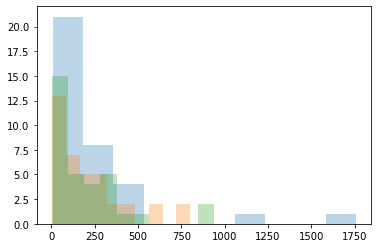

In [27]:
plt.hist(model[model.success].success_diff, alpha=0.3)
plt.hist(ots[ots.success].success_diff, alpha=0.3)
plt.hist(finetuned[finetuned.success].success_diff, alpha=0.3)

(array([7., 8., 6., 3., 5., 2., 0., 0., 1., 1.]),
 array([0.03952569, 0.12809449, 0.21666329, 0.30523209, 0.39380089,
        0.48236968, 0.57093848, 0.65950728, 0.74807608, 0.83664488,
        0.92521368]),
 <BarContainer object of 10 artists>)

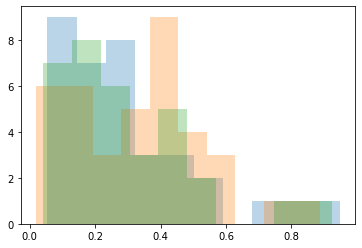

In [25]:
plt.hist(model[model.success].apply(lambda x: x.success_diff/x.orig_rank, axis=1), alpha=0.3)
plt.hist(ots[ots.success].apply(lambda x: x.success_diff/x.orig_rank, axis=1), alpha=0.3)
plt.hist(finetuned[finetuned.success].apply(lambda x: x.success_diff/x.orig_rank, axis=1), alpha=0.3)